# 📈 Technical Indicators Analysis
This notebook visualizes and analyzes common indicators like **MACD**, **RSI**, and **Bollinger Bands** for stock trading signals.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = 'RELIANCE.NS'
df = yf.download(ticker, start='2018-01-01', end='2025-01-01')
df.dropna(inplace=True)
df.head()


C:\Users\sneha\AppData\Local\Temp\ipykernel_9968\3068185472.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2018-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2018-01-01,403.469818,409.213066,402.471953,409.213066,9453202
2018-01-02,404.090698,407.816071,401.984097,404.911171,9499419
2018-01-03,405.709473,410.676626,404.933348,410.233114,13507800
2018-01-04,408.148682,408.813935,406.108602,407.195164,9008932
2018-01-05,409.457001,411.075772,408.126523,408.813951,7441284


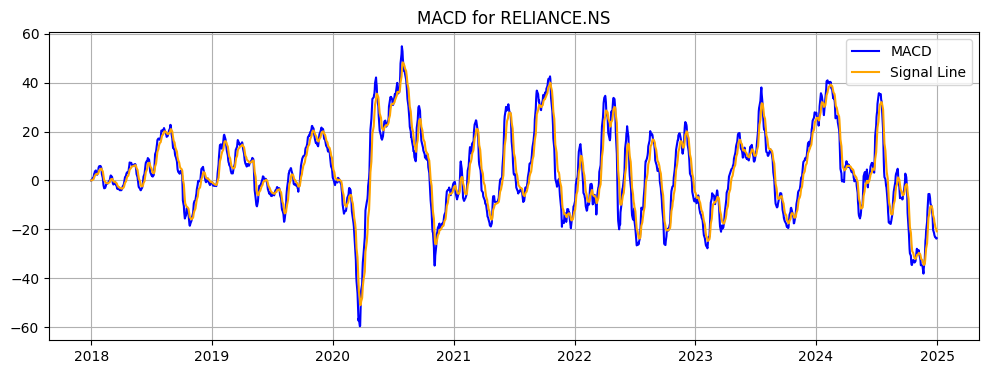

In [2]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12,4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='orange')
plt.title(f"MACD for {ticker}")
plt.grid()
plt.legend()
plt.show()


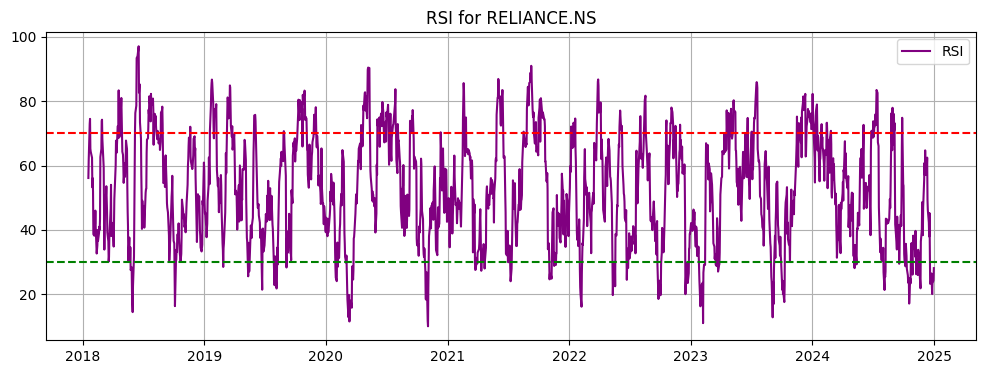

In [3]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

plt.figure(figsize=(12,4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f"RSI for {ticker}")
plt.grid()
plt.legend()
plt.show()


In [4]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['BB_upper'] = df['MA20'] + 2 * df['Close'].rolling(window=20).std()
df['BB_lower'] = df['MA20'] - 2 * df['Close'].rolling(window=20).std()

plt.figure(figsize=(12,4))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['BB_upper'], label='Upper Band', linestyle='--')
plt.plot(df['MA20'], label='20-Day MA', linestyle='--')
plt.plot(df['BB_lower'], label='Lower Band', linestyle='--')
plt.fill_between(df.index, df['BB_lower'], df['BB_upper'], color='gray', alpha=0.1)
plt.title(f"Bollinger Bands for {ticker}")
plt.grid()
plt.legend()
plt.show()


ValueError: Cannot set a DataFrame with multiple columns to the single column BB_upper